# **과대적합과 과소적합**

##  * IMDB dataset

In [ ]:
from keras.datasets import imdb
import numpy as np

(traindata,trainlabels),(testdata, testlabels) = imdb.load_data(num_words=10000)

def vectorize_sequence (seq, dimension=10000):
  results = np.zeros((len(seq),dimension)) # 영행렬 생성
  for i, seq in enumerate(seq):
    results[i,seq] = 1. # 값을 0에서 1로 변경
  return results

# data를 벡터로 변환
xtrain = vectorize_sequence(traindata)
xtest = vectorize_sequence(testdata)

# label을 벡터로 변환
ytrain=np.asarray(trainlabels).astype('float32')
ytest=np.asarray(testlabels).astype('float32')

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

## * 1) 네트워크 크기 축소

영화 리뷰 분류 모델의 원래 네트워크

In [ ]:
from keras import models,layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [ ]:
original_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


네트워크 크기 축소 (16->6)

In [ ]:
# 모델에 있는 학습 파라미터의 수(=모델의 기억 용량)을 줄인다
# 파라미터 수는 층의 수와 각 층의 유닛 수에 의해 결정된다
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(6, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(6, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [ ]:
smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6)                 60006     
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 60,055
Trainable params: 60,055
Non-trainable params: 0
_________________________________________________________________


pyplot을 활용해  
original_model과 smaller_model의 두 네트워크의 검증 손실을 비교

In [ ]:
original_hist = original_model.fit(xtrain, ytrain,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(xtest, ytest))

Epoch 1/20
49/49 [==============================] - 3s 52ms/step - loss: 0.5244 - acc: 0.7507 - val_loss: 0.3197 - val_acc: 0.8840
Epoch 2/20
49/49 [==============================] - 2s 37ms/step - loss: 0.2559 - acc: 0.9129 - val_loss: 0.2814 - val_acc: 0.8892
Epoch 3/20
49/49 [==============================] - 2s 42ms/step - loss: 0.1908 - acc: 0.9345 - val_loss: 0.3119 - val_acc: 0.8736
Epoch 4/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1599 - acc: 0.9445 - val_loss: 0.3006 - val_acc: 0.8817
Epoch 5/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1389 - acc: 0.9543 - val_loss: 0.3399 - val_acc: 0.8714
Epoch 6/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1194 - acc: 0.9605 - val_loss: 0.3450 - val_acc: 0.8727
Epoch 7/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1008 - acc: 0.9670 - val_loss: 0.4182 - val_acc: 0.8578
Epoch 8/20
49/49 [==============================] - 2s 38ms/step - loss: 0.0904 - a

In [ ]:
smaller_model_hist = smaller_model.fit(xtrain, ytrain,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(xtest, ytest))

Epoch 1/20
49/49 [==============================] - 3s 49ms/step - loss: 0.6357 - acc: 0.6624 - val_loss: 0.4909 - val_acc: 0.8619
Epoch 2/20
49/49 [==============================] - 2s 35ms/step - loss: 0.4294 - acc: 0.8844 - val_loss: 0.3744 - val_acc: 0.8781
Epoch 3/20
49/49 [==============================] - 2s 35ms/step - loss: 0.3102 - acc: 0.9107 - val_loss: 0.3134 - val_acc: 0.8873
Epoch 4/20
49/49 [==============================] - 2s 35ms/step - loss: 0.2436 - acc: 0.9246 - val_loss: 0.3032 - val_acc: 0.8802
Epoch 5/20
49/49 [==============================] - 2s 35ms/step - loss: 0.2021 - acc: 0.9338 - val_loss: 0.2832 - val_acc: 0.8875
Epoch 6/20
49/49 [==============================] - 2s 34ms/step - loss: 0.1765 - acc: 0.9400 - val_loss: 0.2815 - val_acc: 0.8879
Epoch 7/20
49/49 [==============================] - 2s 34ms/step - loss: 0.1537 - acc: 0.9502 - val_loss: 0.2885 - val_acc: 0.8869
Epoch 8/20
49/49 [==============================] - 2s 34ms/step - loss: 0.1396 - a

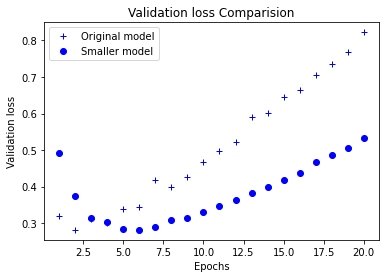

In [ ]:
import matplotlib.pyplot as plt


epochs = range(1, 21) # 1~20
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.title('Validation loss Comparision')
plt.legend()

각 층의 유닛 수가 더 작은 네트워크가 더 나중에 과대적합되기 시작하고, 과대적합이 시작된 후에 성능이 더 천천히 감소된다는 것을 알 수 있다.

+) 더 큰 용량을 가진 네트워크와 비교

In [ ]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(1024, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(1024, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [ ]:
bigger_model_hist = bigger_model.fit(xtrain, ytrain,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(xtest, ytest))

Epoch 1/20
49/49 [==============================] - 24s 488ms/step - loss: 0.7912 - acc: 0.6871 - val_loss: 0.2878 - val_acc: 0.8834
Epoch 2/20
49/49 [==============================] - 23s 468ms/step - loss: 0.2308 - acc: 0.9121 - val_loss: 0.2718 - val_acc: 0.8900
Epoch 3/20
49/49 [==============================] - 23s 467ms/step - loss: 0.1152 - acc: 0.9587 - val_loss: 0.4289 - val_acc: 0.8643
Epoch 4/20
49/49 [==============================] - 23s 465ms/step - loss: 0.0812 - acc: 0.9776 - val_loss: 0.5904 - val_acc: 0.8000
Epoch 5/20
49/49 [==============================] - 23s 465ms/step - loss: 0.0266 - acc: 0.9950 - val_loss: 0.3894 - val_acc: 0.8850
Epoch 6/20
49/49 [==============================] - 23s 471ms/step - loss: 0.0021 - acc: 1.0000 - val_loss: 1.3646 - val_acc: 0.7918
Epoch 7/20
49/49 [==============================] - 23s 468ms/step - loss: 0.3676 - acc: 0.9568 - val_loss: 0.6381 - val_acc: 0.8852
Epoch 8/20
49/49 [==============================] - 23s 469ms/step - 

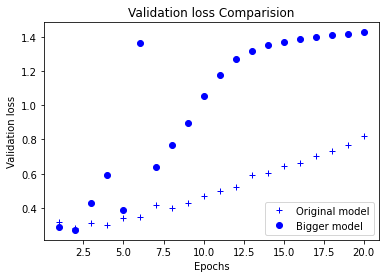

In [ ]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.title('Validation loss Comparision')
plt.legend()

용량이 더 큰 네트워크는 과대적합이 매우 빠르게 시작되고, 불안정한 검증 손실을 보인다.  
bigger_model과 original_model의 training loss 비교 그래프는 다음과 같다.  

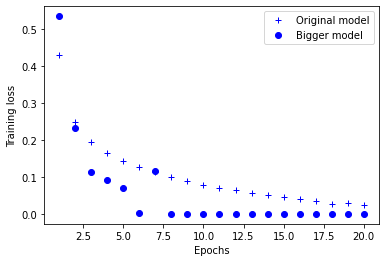

In [ ]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

용량이 더 큰 네트워크는 훈련 손실이 빠르게 0에 가까워지므로, 더 빠르게 훈련 데이터를 모델링 할 수 있다. 이는 곧 과대적합에 더 민감해진다는 의미이다.

## * 2) 가중치 규제 추가

간단한 모델(파라미터 값 분포의 엔트로피가 작은 모델, 적은 수의 파라미터를 가진 모델)이  
복잡한 모델보다 과대적합 될 가능성이 낮다.  
네트워크의 복잡도에 제한을 두어 가중치가 작은 값을 가지도록 강제하는 것이 가중치 규제이다.

### 2-1) L2 규제

In [ ]:
# L2 규제 : 가중치의 제곱에 비례하는 비용이 추가
# l2(0.001) : 가중치 행렬의 모든 원소를 제곱하고, 0.001을 곱해서 네트워크의 전체 손실에 더한다.
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
l2_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

L2-regularized model과 original model의 validation loss를 시각화해 비교

In [ ]:
l2_model_hist = l2_model.fit(xtrain, ytrain,
                             epochs=20,
                             batch_size=512,
                             validation_data=(xtest, ytest))

Epoch 1/20
49/49 [==============================] - 4s 81ms/step - loss: 0.5844 - acc: 0.7492 - val_loss: 0.3971 - val_acc: 0.8691
Epoch 2/20
49/49 [==============================] - 2s 39ms/step - loss: 0.3310 - acc: 0.9042 - val_loss: 0.3367 - val_acc: 0.8869
Epoch 3/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2659 - acc: 0.9251 - val_loss: 0.3288 - val_acc: 0.8888
Epoch 4/20
49/49 [==============================] - 2s 42ms/step - loss: 0.2479 - acc: 0.9288 - val_loss: 0.3370 - val_acc: 0.8852
Epoch 5/20
49/49 [==============================] - 2s 45ms/step - loss: 0.2286 - acc: 0.9410 - val_loss: 0.3399 - val_acc: 0.8850
Epoch 6/20
49/49 [==============================] - 5s 108ms/step - loss: 0.2266 - acc: 0.9376 - val_loss: 0.3535 - val_acc: 0.8793
Epoch 7/20
49/49 [==============================] - 3s 65ms/step - loss: 0.2205 - acc: 0.9421 - val_loss: 0.3709 - val_acc: 0.8738
Epoch 8/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2077 - 

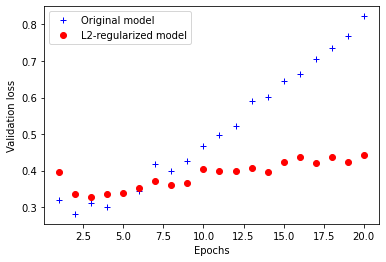

In [ ]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'ro', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

모델의 파라미터 수(기억 용량)이 같더라도, L2-regularized model이 과대적합을 더 잘 견딘다는 것을 알 수 있다.

### 2-2) L1 규제

In [ ]:
l1_model = models.Sequential()
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001),
                          activation='relu', input_shape=(10000,)))
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001),
                          activation='relu'))
l1_model.add(layers.Dense(1, activation='sigmoid'))

l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [ ]:
l1_model_hist = l1_model.fit(xtrain, ytrain,
                             epochs=20,
                             batch_size=512,
                             validation_data=(xtest, ytest))

Epoch 1/20
49/49 [==============================] - 3s 46ms/step - loss: 0.6832 - acc: 0.7490 - val_loss: 0.4465 - val_acc: 0.8755
Epoch 2/20
49/49 [==============================] - 2s 37ms/step - loss: 0.4044 - acc: 0.8881 - val_loss: 0.3905 - val_acc: 0.8770
Epoch 3/20
49/49 [==============================] - 2s 37ms/step - loss: 0.3465 - acc: 0.9041 - val_loss: 0.3683 - val_acc: 0.8840
Epoch 4/20
49/49 [==============================] - 2s 37ms/step - loss: 0.3264 - acc: 0.9086 - val_loss: 0.3626 - val_acc: 0.8863
Epoch 5/20
49/49 [==============================] - 2s 37ms/step - loss: 0.3172 - acc: 0.9109 - val_loss: 0.3589 - val_acc: 0.8868
Epoch 6/20
49/49 [==============================] - 2s 37ms/step - loss: 0.3044 - acc: 0.9191 - val_loss: 0.3604 - val_acc: 0.8846
Epoch 7/20
49/49 [==============================] - 2s 37ms/step - loss: 0.2943 - acc: 0.9197 - val_loss: 0.3614 - val_acc: 0.8849
Epoch 8/20
49/49 [==============================] - 2s 37ms/step - loss: 0.2877 - a

L1-regularized model과 original model의 validation loss를 시각화해 비교

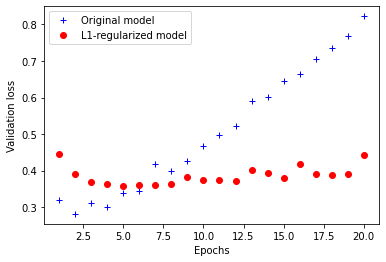

In [ ]:
l1_model_val_loss = l1_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l1_model_val_loss, 'ro', label='L1-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

# L1 모델이 과대적합을 더 잘 견딘다

### 2-2) L1과 L2 규제 병행

In [ ]:
l1l2_model = models.Sequential()
l1l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001),
                            activation='relu', input_shape=(10000,)))
l1l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001),
                            activation='relu'))
l1l2_model.add(layers.Dense(1, activation='sigmoid'))

l1l2_model.compile(optimizer='rmsprop',
                   loss='binary_crossentropy',
                   metrics=['acc'])

In [ ]:
l1l2_model_hist = l1l2_model.fit(xtrain, ytrain,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(xtest, ytest))

Epoch 1/20
49/49 [==============================] - 4s 61ms/step - loss: 0.6767 - acc: 0.7328 - val_loss: 0.4610 - val_acc: 0.8438
Epoch 2/20
49/49 [==============================] - 2s 38ms/step - loss: 0.3848 - acc: 0.8931 - val_loss: 0.3735 - val_acc: 0.8892
Epoch 3/20
49/49 [==============================] - 2s 38ms/step - loss: 0.3321 - acc: 0.9077 - val_loss: 0.4037 - val_acc: 0.8680
Epoch 4/20
49/49 [==============================] - 2s 38ms/step - loss: 0.3225 - acc: 0.9090 - val_loss: 0.3799 - val_acc: 0.8769
Epoch 5/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2976 - acc: 0.9207 - val_loss: 0.3806 - val_acc: 0.8768
Epoch 6/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2953 - acc: 0.9201 - val_loss: 0.3656 - val_acc: 0.8862
Epoch 7/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2792 - acc: 0.9267 - val_loss: 0.3719 - val_acc: 0.8852
Epoch 8/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2782 - a

L1,L2-regularized model과 original model의 validation loss를 시각화해 비교

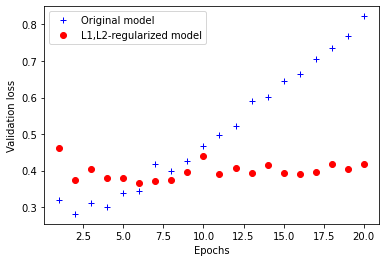

In [ ]:
l1l2_model_val_loss = l1l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l1l2_model_val_loss, 'ro', label='L1,L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

# L1,L2 병행 모델이 과대적합을 더 잘 견딘다

## * 3) 드롭아웃 추가

훈련 과정에서 무작위로 layer의 일부 feature를 제외시키는(0으로 만드는) 방법

In [ ]:
# 두개의 Dropout층 추가

dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [ ]:
dpt_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                160016    
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
dpt_model_hist = dpt_model.fit(xtrain, ytrain,
                               epochs=20,
                               batch_size=512,
                               validation_data=(xtest, ytest))

Epoch 1/20
49/49 [==============================] - 3s 46ms/step - loss: 0.6430 - acc: 0.6071 - val_loss: 0.4397 - val_acc: 0.8611
Epoch 2/20
49/49 [==============================] - 2s 37ms/step - loss: 0.4621 - acc: 0.7929 - val_loss: 0.3282 - val_acc: 0.8822
Epoch 3/20
49/49 [==============================] - 2s 37ms/step - loss: 0.3600 - acc: 0.8565 - val_loss: 0.2917 - val_acc: 0.8868
Epoch 4/20
49/49 [==============================] - 2s 36ms/step - loss: 0.2987 - acc: 0.8872 - val_loss: 0.2740 - val_acc: 0.8914
Epoch 5/20
49/49 [==============================] - 2s 36ms/step - loss: 0.2606 - acc: 0.9087 - val_loss: 0.2755 - val_acc: 0.8898
Epoch 6/20
49/49 [==============================] - 2s 35ms/step - loss: 0.2242 - acc: 0.9270 - val_loss: 0.2871 - val_acc: 0.8871
Epoch 7/20
49/49 [==============================] - 2s 36ms/step - loss: 0.2002 - acc: 0.9346 - val_loss: 0.2993 - val_acc: 0.8880
Epoch 8/20
49/49 [==============================] - 2s 35ms/step - loss: 0.1760 - a

Dropout-regularized model과 original model의 validation loss를 시각화해서 비교

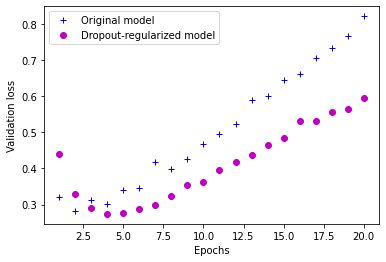

In [ ]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'mo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

Dropout-regularized model이 과대적합을 더 잘 견딘다.